
# Project: Investigate a Dataset - TMDB Movies


   <a href="https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf">TMDB-Movies Dataset Location</a>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data Collection and Posing the Questions 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Questions for Analysis
+ What is the relationship between the bugdet used and the revenue?
+ Which movie had the highest budget?
+ What is the most popular movie?
+ Who was the director and the cast members of the movie which was the most popular?
+ Who was the director and the cast members of the movie which had the highest grossing?
+ Which is the highest grossing movie?
+ Which genres are most popular from year to year?
+ How has the budget been over the years?
+ How has the revenue been over the years?
+ What kinds of properties are associated with movies that have high revenues?


<a id='wrangling'></a>
## Data Wrangling

__*Here we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.*__

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> We remove (keyword, overview and homepage) columns since we do not need the here

In [6]:
# df.drop(["keywords"], axis=1, inplace= True)
# df.drop(["overview"], axis=1, inplace= True)
# df.drop(["homepage"], axis=1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Let's also remove the (imdb_id and tagline) columns since they also will not be of much use

In [9]:
df.drop(["imdb_id"], axis=1, inplace= True)
df.drop(["tagline"], axis=1, inplace= True)

> We can leave the data as it is the Empty rows in the different columns will not affect our analysis

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

0

> We have droped the 1 row which had been duplicated

In [16]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [17]:
df["release_date"] = pd.to_datetime(df["release_date"])

In [19]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

> We have changed the datatype for (release_date) from string to datetime

> Otherwise our data is clean to start doing EDA (Exploratory Data Analysis)

<a id='eda'></a>
## EDA Exploring our data

##### Statistical Summary

In [2]:
df.describe(percentiles = [0.25,0.50,0.75,0.95, 0.99]).round(2)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,1.086600e+04,1.086600e+04,10866.00,10866.00,10866.00,10866.00,1.086600e+04,1.086600e+04
mean,66064.18,0.65,1.462570e+07,3.982332e+07,102.07,217.39,5.97,2001.32,1.755104e+07,5.136436e+07
std,92130.14,1.00,3.091321e+07,1.170035e+08,31.38,575.62,0.94,12.81,3.430616e+07,1.446325e+08
min,5.00,0.00,0.000000e+00,0.000000e+00,0.00,10.00,1.50,1960.00,0.000000e+00,0.000000e+00
25%,10596.25,0.21,0.000000e+00,0.000000e+00,90.00,17.00,5.40,1995.00,0.000000e+00,0.000000e+00
50%,20669.00,0.38,0.000000e+00,0.000000e+00,99.00,38.00,6.00,2006.00,0.000000e+00,0.000000e+00
75%,75610.00,0.71,1.500000e+07,2.400000e+07,111.00,145.75,6.60,2011.00,2.085325e+07,3.369710e+07
95%,288556.00,2.05,7.500000e+07,2.136722e+08,139.00,1025.75,7.40,2015.00,8.937514e+07,2.765544e+08
99%,347529.80,4.58,1.500000e+08,5.872457e+08,184.00,3018.50,7.90,2015.00,1.623004e+08,6.987106e+08
max,417859.00,32.99,4.250000e+08,2.781506e+09,900.00,9767.00,9.20,2015.00,4.250000e+08,2.827124e+09


In [4]:
#interquatile range
# df["release_year"].quantile(0.75)-df["release_year"].quantile(0.25)

> Displaying of the Statistical summary for measures which summarizes important features of data, often with a single number

> _We can be able to see that most amount of movies were produced between the year 2006 - 2011 (25%-75%)_


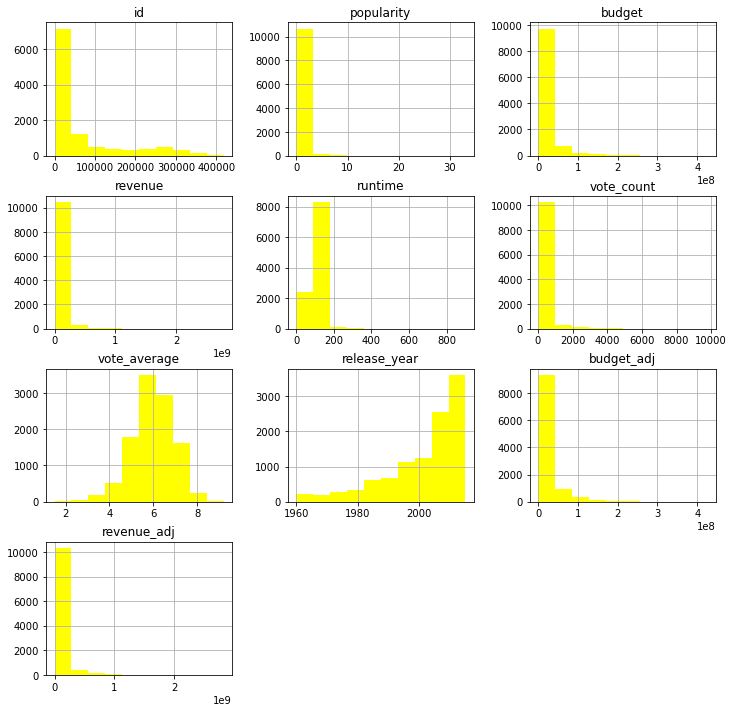

In [24]:
df.hist(figsize = (12,12), color ="yellow");

> Shows the distributions of the various variables in the data sets

> Most of the variables are skewed to the right except for _release-year_ and _vote-average_

> We can see that most of the movies were released in the late _90's_ and early _2000's_

> **Research Question 1 - What is the relationship between the bugdet used and the revenue?**

##### Draw a scatter plot of Revenue against Budget

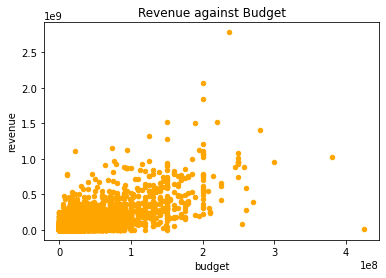

In [8]:
df.plot.scatter(x = "budget", y = "revenue", title = "Revenue against Budget", c = "orange");

> _A scatter plot shows a relationship between 2 variables_

> Here we can see that the **_revenue_** and **_budget_** is positively correlated

> **Research Question 2 - Which movie had the highest budget?**

In [11]:
df["budget"].max()

425000000

In [22]:
def maxbp(a):
    max_bud = df[a].max()
    maxbp = df[df[a] == max_bud]
    return maxbp
maxbp("budget")
#max_bud = df["budget"].max()
#df[df["budget"] == max_bud]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


> Here we are checking the whole row whereby we have the maximum **budget** spent on the movie

> **Research Question 3 - What is the most popular movie?**

In [13]:
df["popularity"].max()

32.985763

In [23]:
maxbp("popularity")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


> Here we are checking the whole row whereby we have the highest **popularity** of a movie

> **Research Question 4 - Who was the director and the cast members of the movie which had the highest grossing?**

> **Research Question 5 - Which is the highest grossing movie?**

In [15]:
df["revenue"].max()

2781505847

In [21]:
maxbp("revenue")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


> Here we are checking the whole row whereby we have the highest **revenue** made by a movie

> **Research Question 6 - Which genres are most popular from year to year?**

In [3]:
#pop = df.groupby(["release_year"])["popularity"].max()
#df[df["release_year"] == pop]

In [16]:
df.groupby(["release_year"])["popularity"].max()

release_year
1960     2.610362
1961     2.631987
1962     3.170651
1963     2.508235
1964     3.153791
1965     1.910465
1966     1.227582
1967     2.550704
1968     3.309196
1969     1.778746
1970     1.936962
1971     3.072555
1972     5.738034
1973     2.272486
1974     3.264571
1975     3.258151
1976     2.582657
1977    12.037933
1978     1.697618
1979     4.935897
1980     5.488441
1981     4.578300
1982     4.215642
1983     4.828854
1984     4.831966
1985     6.095293
1986     2.485419
1987     3.474728
1988     3.777441
1989     4.143585
1990     2.679627
1991     3.852269
1992     4.586426
1993     2.571339
1994     8.093754
1995     4.765359
1996     4.480733
1997     6.668990
1998     4.180540
1999     8.947905
2000     4.271452
2001     8.575419
2002     8.095275
2003     7.122455
2004     5.827781
2005     5.939927
2006     5.838503
2007     4.965391
2008     8.466668
2009     9.432768
2010     9.363643
2011     8.411577
2012     7.637767
2013     6.112766
2014    24.9491

In [36]:
df["release_year"].nunique()

56

> **Research Question 7 - How has the revenue been over the years?**

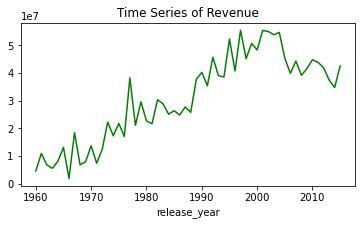

In [26]:
def timeseries (a, b, c, d, e):
    mean_hp = df.groupby(a)[b].mean()
    mean_hp.plot(kind = c, figsize = (6,3), c = d, title = e)
    return timeseries
timeseries ("release_year","revenue","line","green", "Time Series of Revenue");



> Here we choose to plot a time series by grouping the data with the **release_year** and getting the mean **revenue** 

>The time series shows a steady increase of the **revenue** of a movie up to the year **2000** where it starts to decline

> **Research Question 8 - How has the budget been over the years?**

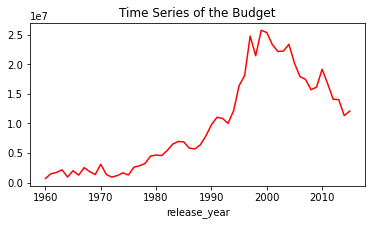

In [28]:
timeseries ("release_year","budget","line","red", "Time Series of the Budget");


> Here we choose to plot a time series by grouping the data with the **release_year** and getting the mean **budget** 

>The time series shows a steady increase of the **budget** of a movie up to the year **2000** where it starts to decline

> **Research Question 9 - What kinds of properties are associated with movies that have high revenues?**

In [16]:
def ass(a,b):
    ass = df.groupby([a])[b].mean()
    return ass
ass("budget","revenue")
#df.groupby(["budget"])["revenue"].mean()

budget
0            3.106567e+06
1            3.695000e+02
2            1.600000e+01
3            1.966667e+01
5            0.000000e+00
                 ...     
270000000    3.910812e+08
280000000    1.405036e+09
300000000    9.610000e+08
380000000    1.021683e+09
425000000    1.108757e+07
Name: revenue, Length: 557, dtype: float64

In [30]:
ass("genres","revenue")

genres
Action                                      3.700596e+07
Action|Adventure                            3.228354e+07
Action|Adventure|Animation                  0.000000e+00
Action|Adventure|Animation|Comedy|Drama     1.662719e+07
Action|Adventure|Animation|Comedy|Family    0.000000e+00
                                                ...     
Western|Drama|Crime|Romance                 1.031243e+06
Western|History                             1.579519e+07
Western|History|War                         2.581996e+07
Western|Horror|Thriller                     0.000000e+00
Western|Thriller                            6.147000e+03
Name: revenue, Length: 2039, dtype: float64

> We grouped the movies based on their **genres** and checked the mean of their **revenues** and checked what **genres** had the highest revenues.

In [31]:
ass("cast","revenue")

cast
"Weird Al" Yankovic|Victoria Jackson|Michael Richards|David Bowe|Fran Drescher                                          0.0
50 Cent|Forest Whitaker|Robert De Niro|Ryan O'Nan|Matt Gerald                                                           0.0
50 Cent|Joy Bryant|Adewale Akinnuoye-Agbaje|Omar Benson Miller|Terrence Howard                                   46442528.0
50 Cent|Ryan Phillippe|Bruce Willis|James Remar|Randy Couture                                                           0.0
50 Cent|Tamer Hassan|Danny Dyer|Blake Ritson|EsmÃ© Bianco                                                               0.0
                                                                                                                    ...    
Ã“lafur Darri Ã“lafsson|JÃ³hann G. JÃ³hannsson|Thora Bjorg Helga|TheodÃ³r JÃºlÃ­usson|MarÃ­a SigurÃ°ardÃ³ttir           0.0
Ã“scar Jaenada|Michael Imperioli|Luis Gerardo MÃ©ndez|JoaquÃ­n Cosio|Teresa Ruiz                                        0.0
Ã‡e

<a id='conclusions'></a>
## Conclusion

+ From the scatter plot it shows that the Budget and the Revenue they have a positive correlation whereby an increase in budget will cause an increase in revenue
+ The movie which had the highest budget was *__The Warrior's Way__*
+ The most popular movie was *__Jurassic World__*
+ The director of the movie with the highest gross was *__James Cameron__* and cast members were _**Sam Worthington, Zoe Saldana, Sigourney Weaver**_
+ The movie which had the highest gross was *__Avatar__*
+ The revenue of the movies over the years has been inclining from the year *1960* up to *2000* where it started declining
+ The budget of the movies over the years has been inclining from the year *1960* up to *2000* where it started declining
+ Some of the properties associated with movies that have high revenues are *__Have high budgets and the Genres are mostly Action and Adventure__*

<a id='limitations'></a>
## Limitations

> We have only worked with few variables hence limiting the amount of analysis

> There were alot of Null values 

> Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.